<a href="https://colab.research.google.com/github/IrinaFab/Bank-MK/blob/main/BankMkting_ROC_curves_DT%2C_GB%2C_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
# Import libraries
## Basic libraries
import pandas as pd
import numpy as np
from operator import itemgetter 
import warnings
from pandas._libs import index

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn import tree
from sklearn.tree import _tree
from sklearn.ensemble import RandomForestClassifier    
from sklearn.ensemble import GradientBoostingClassifier  
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats
from IPython.display import Image

from imblearn.over_sampling import SMOTE

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
data = pd.read_csv('/content/drive/MyDrive/outpur.csv')

In [181]:
data.shape

(41170, 38)

In [183]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0.000,1.000,2.000,3.000,4.000
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000


In [184]:
data = data.drop(['Unnamed: 0'], axis=1)
data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'z_marital_divorced', 'z_marital_married', 'z_marital_single',
       'z_default_no', 'z_default_yes', 'z_housing_no', 'z_housing_yes',
       'z_loan_no', 'z_loan_yes', 'z_contact_cellular', 'z_contact_telephone',
       'z_day_of_week_fri', 'z_day_of_week_mon', 'z_day_of_week_thu',
       'z_day_of_week_tue', 'z_day_of_week_wed', 'z_poutcome_failure',
       'z_poutcome_success', 'z_edu_new_high', 'z_edu_new_post_high',
       'z_edu_new_pre_high', 'z_job_new_blue_collar', 'z_job_new_not_working',
       'z_job_new_white_collar', 'z_season_fall', 'z_season_spring',
       'z_season_summer'],
      dtype='object')

In [185]:
data.shape

(41170, 37)

In [186]:
#replacing no and yes by 0 and 1 for 'y' (deposit)
data['y'] = data['y'].replace(['no','yes'],[0,1])
data['y'].unique()

array([0, 1])

In [187]:
TARGET = 'y'

In [188]:
# creating a copy of the data set
x = data.copy()
x.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
y,0.000,0.000,0.000,0.000,0.000


In [189]:
# Preparing the data to be used to build the decision tree, dropping TARGET 
x = x.drop( TARGET, axis = 1 )
x.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
z_marital_divorced,0.000,0.000,0.000,0.000,0.000


In [190]:
x.shape

(41170, 36)

In [191]:
varNames = x.columns

# Scaler 
Due to the different qualities of the indicators, standardized processing generally plays a crucial role in transforming raw data into dimensionless index, that is, each index value is at the same scale level. 

In [192]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [193]:
x = pd.DataFrame(x)

In [194]:
x.head().T

,0,1,2,3,4
0,1.533626,1.629600,-0.289875,-0.001954,1.533626
1,-0.565884,-0.565884,-0.565884,-0.565884,-0.565884
2,0.195391,0.195391,0.195391,0.195391,0.195391
3,-0.349505,-0.349505,-0.349505,-0.349505,-0.349505
4,0.648055,0.648055,0.648055,0.648055,0.648055
5,0.722580,0.722580,0.722580,0.722580,0.722580
6,0.886542,0.886542,0.886542,0.886542,0.886542
7,0.712435,0.712435,0.712435,0.712435,0.712435
8,0.331689,0.331689,0.331689,0.331689,0.331689
9,-0.355097,-0.355097,-0.355097,-0.355097,-0.355097


In [195]:
varNames_std = []
for i in varNames:
  newName = "std_" + i
  varNames_std.append(newName)

x.columns = varNames_std
x.head()

,std_age,std_campaign,std_pdays,std_previous,std_emp.var.rate,std_cons.price.idx,std_cons.conf.idx,std_euribor3m,std_nr.employed,std_z_marital_divorced,...,std_z_poutcome_success,std_z_edu_new_high,std_z_edu_new_post_high,std_z_edu_new_pre_high,std_z_job_new_blue_collar,std_z_job_new_not_working,std_z_job_new_white_collar,std_z_season_fall,std_z_season_spring,std_z_season_summer
0,1.533626,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,-0.355097,...,-0.185672,-0.548256,-0.856047,1.513333,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475
1,1.629600,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,-0.355097,...,-0.185672,1.823966,-0.856047,-0.660793,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475
2,-0.289875,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,-0.355097,...,-0.185672,1.823966,-0.856047,-0.660793,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475
3,-0.001954,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,-0.355097,...,-0.185672,-0.548256,-0.856047,1.513333,-1.021211,-0.309832,1.240441,-0.387962,1.195849,-0.910475
4,1.533626,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,-0.355097,...,-0.185672,1.823966,-0.856047,-0.660793,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475


In [196]:
x.shape

(41170, 36)

In [197]:
# storing the target into a dataframe
y = data[[TARGET]] 
y.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [198]:
# Splitting dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [199]:
print('FLAG DATA:', '\n')
print('Shape of original INPUT data set:', x.shape)
print('Shape of original OUTPUT data set:', y.shape, '\n')
print('Shape of input TRAINING data set:', x_train.shape)
print('Shape of output TRAINING data set:', y_train.shape, '\n')
print('Shape of input TEST data set:', x_test.shape)
print('Shape of output TEST data set:', y_test.shape)

FLAG DATA: 

Shape of original INPUT data set: (41170, 36)
Shape of original OUTPUT data set: (41170, 1) 

Shape of input TRAINING data set: (32936, 36)
Shape of output TRAINING data set: (32936, 1) 

Shape of input TEST data set: (8234, 36)
Shape of output TEST data set: (8234, 1)


# Balancing target with SMOTE

In [200]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [201]:
print('Shape of input TRAINING data set following SMOTE:', x_train.shape)
print('Shape of output TRAINING data set following SMOTE:', y_train.shape, '\n')
print('Shape of input TEST data set following SMOTE:', x_test.shape)
print('Shape of output TEST data set following SMOTE:', y_test.shape)

Shape of input TRAINING data set following SMOTE: (58388, 36)
Shape of output TRAINING data set following SMOTE: (58388, 1) 

Shape of input TEST data set following SMOTE: (8234, 36)
Shape of output TEST data set following SMOTE: (8234, 1)


In [202]:
y_train.value_counts()

y
0    29194
1    29194
dtype: int64

# DESICION TREE

In [203]:
# creating decision tree classifier my_tree setting 6-level deep with respect of TARGET
# fitting the decision tree 
my_tree = tree.DecisionTreeClassifier (max_depth = 6) 
my_tree = my_tree.fit (x_train, y_train [TARGET]) 

In [204]:
# predicting subscription chances for the training and test data
y_Pred_train = my_tree.predict(x_train)
y_Pred_test = my_tree.predict(x_test)

In [205]:
# calculating the accuracy based on the metrics between the real scores and predicted scores for taining and test datasets
print('The accuracy of the model based on the training data set is ', metrics.accuracy_score(y_train [TARGET], y_Pred_train))
print('The accuracy of the model based on the test data set is ', metrics.accuracy_score(y_test [TARGET], y_Pred_test))

The accuracy of the model based on the training data set is  0.8517846132767007
The accuracy of the model based on the test data set is  0.8752732572261356


# Confusion Matrix DT

In [206]:
confusion_matrix(y_test[TARGET], y_Pred_test)
pd.crosstab(y_test[TARGET], y_Pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6734,606,7340
1,421,473,894
All,7155,1079,8234


# Classification report DT

In [207]:
print(classification_report(y_test[TARGET], y_Pred_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7340
           1       0.44      0.53      0.48       894

    accuracy                           0.88      8234
   macro avg       0.69      0.72      0.70      8234
weighted avg       0.89      0.88      0.88      8234



# Receiver Operating Characteristics Curve (ROC) and Area Under the Curve (AUC)

In [208]:
# creating the ROC curve
probs = my_tree.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = my_tree.predict_proba(x_test)
# all the probabilities of subscribers for test data set (second column from above)
p1 = probs[:,1]
## displaying the deposit subscribers probability for the first 10 records for test data set
#p1[0:10]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

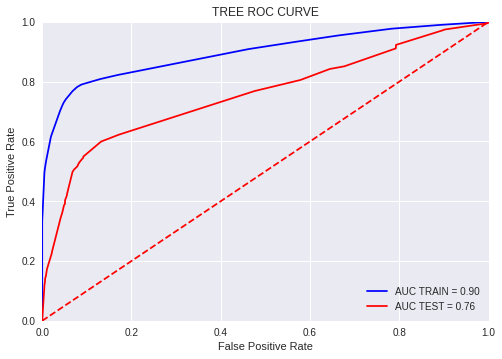

In [209]:
# printing ROC curve using matplotlib for training and test data 
plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [210]:
# a 4-leveltree

feature_cols = list(x.columns.values) 
tree.export_graphviz(my_tree, out_file = 'BANK.txt',filled = True, rounded = True, feature_names = feature_cols, impurity = False, class_names=['YES', 'NO'])

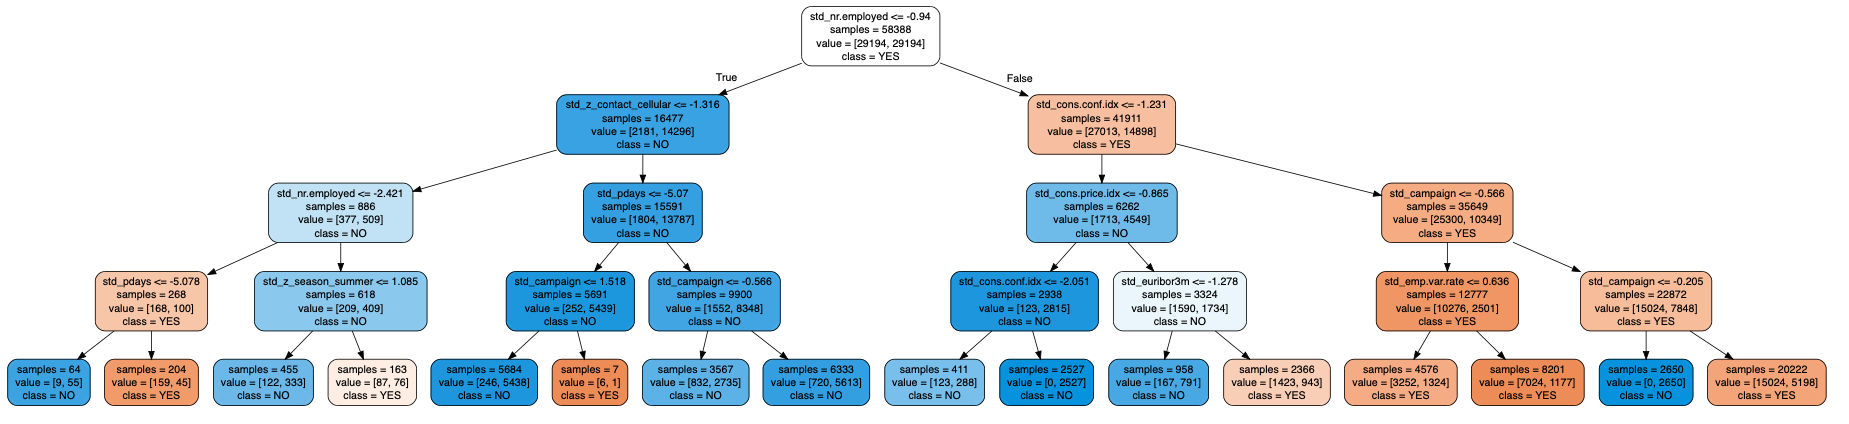

In [211]:
def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else 'undefined!' for i in tree_.feature ]
    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

In [212]:
vars_tree_flag = getTreeVars( my_tree, feature_cols )

In [213]:
for i in vars_tree_flag:
    print(i)

std_age
std_campaign
std_pdays
std_previous
std_emp.var.rate
std_cons.price.idx
std_cons.conf.idx
std_euribor3m
std_nr.employed
std_z_marital_single
std_z_loan_no
std_z_contact_cellular
std_z_contact_telephone
std_z_day_of_week_mon
std_z_day_of_week_thu
std_z_edu_new_post_high
std_z_edu_new_pre_high
std_z_job_new_blue_collar
std_z_job_new_not_working
std_z_season_fall


From scratch

In [214]:
y_Pred_train = my_tree.predict_proba(x_train)[:, 1]
y_Pred_test = my_tree.predict_proba(x_test)[:, 1]

In [215]:
def roc_from_scratch(probabilities, y_test, partitions=10):
    roc = {}
    for i in range(partitions + 1):
        
        threshold_vector = [1 if y > i/partitions else 0 for y in probabilities]
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc[i/partitions] = [fpr, tpr]
        
    return pd.DataFrame(roc)

In [216]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [217]:
roc_from_scratch(y_Pred_test, y_test[TARGET], partitions=10).T

,0,1
0.0,1.000000,0.998881
0.1,0.901771,0.974273
0.2,0.475749,0.768456
0.3,0.132016,0.599553
0.4,0.092098,0.549217
0.5,0.082561,0.529083
0.6,0.067847,0.497763
0.7,0.051362,0.403803
0.8,0.041553,0.345638
0.9,0.008038,0.147651


In [218]:
roc_auc_score(y_test[TARGET],y_Pred_test)

0.7563126718236624

## Gradient Boosting

In [227]:
# creating gradient boosting classifier with respect to TARGET
my_GB = GradientBoostingClassifier( random_state = 1 )
my_GB = my_GB.fit( x_train, y_train[ TARGET ] )

In [228]:
# predicting the training and test data sets
y_Pred_train = my_GB.predict(x_train)
y_Pred_test = my_GB.predict(x_test)

In [229]:
# calculating the accuracy based on the metrics between the real scores and the predicted ones for both taining and test data sets
print('The accuracy of the GB model based on the training data set is:', metrics.accuracy_score(y_train[TARGET], y_Pred_train))
print('The accuracy of the GB model based on the testing data set is:', metrics.accuracy_score(y_test[TARGET], y_Pred_test))

The accuracy of the GB model based on the training data set is: 0.8951325614852367
The accuracy of the GB model based on the testing data set is: 0.8830459072139908


# Confusion Matrix GB

In [230]:
confusion_matrix(y_test[TARGET], y_Pred_test)
pd.crosstab(y_test[TARGET], y_Pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6827,513,7340
1,450,444,894
All,7277,957,8234


# Classification Report GB

In [231]:
print(classification_report(y_train[TARGET], y_Pred_train))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     29194
           1       0.93      0.86      0.89     29194

    accuracy                           0.90     58388
   macro avg       0.90      0.90      0.90     58388
weighted avg       0.90      0.90      0.90     58388



In [232]:
print(classification_report(y_test[TARGET], y_Pred_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7340
           1       0.46      0.50      0.48       894

    accuracy                           0.88      8234
   macro avg       0.70      0.71      0.71      8234
weighted avg       0.89      0.88      0.88      8234



# ROC curve GB

In [233]:
probs = my_GB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = my_GB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

In [234]:
# printing variables that are predictive of deposit subscription
feature_cols = list( x.columns.values )
vars_GB_flag = getEnsembleTreeVars( my_GB, feature_cols )

for i in vars_GB_flag:
    print(i)

('std_nr.employed', 100)
('std_campaign', 91)
('std_cons.conf.idx', 35)
('std_z_default_no', 11)
('std_euribor3m', 10)
('std_cons.price.idx', 9)


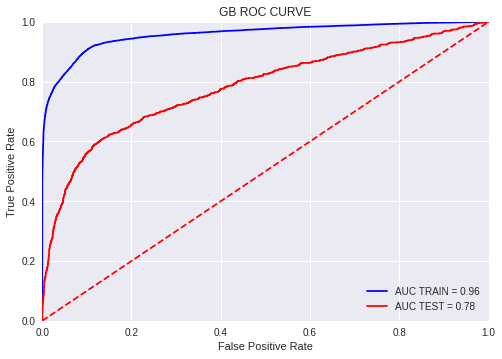

In [235]:
# creating ROC curve 
plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve GB from scratch

In [238]:
y_Pred_train = my_GB.predict_proba(x_train)[:, 1]
y_Pred_test = my_GB.predict_proba(x_test)[:, 1]

In [239]:
def roc_from_scratch(probabilities, y_test, partitions=10):
    roc = {}
    for i in range(partitions + 1):
        
        threshold_vector = [1 if y > i/partitions else 0 for y in probabilities]
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc[i/partitions] = [fpr, tpr]
        
    return pd.DataFrame(roc)

In [240]:
 def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [241]:
roc_from_scratch(y_Pred_test, y_test[TARGET], partitions=10).T   

,0,1
0.0,1.000000,1.000000
0.1,0.886376,0.960850
0.2,0.274251,0.702461
0.3,0.126975,0.598434
0.4,0.094142,0.548098
0.5,0.069891,0.496644
0.6,0.046458,0.398210
0.7,0.021798,0.272931
0.8,0.004360,0.125280
0.9,0.000681,0.031320


In [242]:
roc_auc_score(y_test[TARGET],y_Pred_test)

0.7819824412218301

# Extreme Gradient Boosting 

In [243]:
# creating gradient boosting classifier with respect to TARGET
my_XGB = XGBClassifier( random_state=1)
my_XGB = my_XGB.fit(x_train, y_train[TARGET])

In [244]:
# predicting the training and test data sets
y_Pred_train = my_XGB.predict(x_train)
y_Pred_test = my_XGB.predict(x_test)

In [245]:
# calculating the accuracy based on the metrics between the real scores and the predicted ones for both taining and test data sets
print('The accuracy of the XGB model based on the training data set is ', metrics.accuracy_score(y_train [TARGET], y_Pred_train))
print('The accuracy of the XGB model based on the test data set is ', metrics.accuracy_score(y_test [TARGET], y_Pred_test))

The accuracy of the XGB model based on the training data set is  0.8944474892101116
The accuracy of the XGB model based on the test data set is  0.8807384017488462


# Confusion Matrix XGB

In [246]:
confusion_matrix(y_test[TARGET], y_Pred_test)
pd.crosstab(y_test[TARGET], y_Pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6812,528,7340
1,454,440,894
All,7266,968,8234


# Classification Report XGB

In [247]:
print(classification_report(y_train[TARGET], y_Pred_train))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     29194
           1       0.92      0.86      0.89     29194

    accuracy                           0.89     58388
   macro avg       0.90      0.89      0.89     58388
weighted avg       0.90      0.89      0.89     58388



In [248]:
print(classification_report(y_test[TARGET], y_Pred_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7340
           1       0.45      0.49      0.47       894

    accuracy                           0.88      8234
   macro avg       0.70      0.71      0.70      8234
weighted avg       0.89      0.88      0.88      8234



In [249]:
# creating the ROC curve
probs = my_XGB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = my_XGB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [250]:
# saving the variables for final comparison
fpr_XGB = fpr_test
tpr_XGB = tpr_test
auc_XGB = roc_auc_test

In [251]:
# printing variables that are predictive of deposit subscription
feature_cols = list( x.columns.values )
vars_XGB_flag = getEnsembleTreeVars( my_XGB, feature_cols )

for i in vars_XGB_flag:
    print(i)

('std_nr.employed', 100)
('std_z_default_no', 60)
('std_z_housing_no', 56)
('std_campaign', 55)
('std_cons.conf.idx', 47)
('std_z_edu_new_post_high', 34)
('std_z_marital_single', 30)
('std_z_job_new_blue_collar', 29)
('std_z_contact_cellular', 26)
('std_cons.price.idx', 25)
('std_z_edu_new_high', 18)


# ROC curve XGB

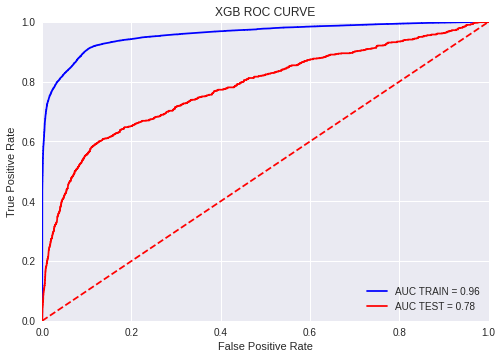

In [252]:
plt.title('XGB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()   

In [254]:
y_Pred_train = my_XGB.predict_proba(x_train)[:, 1]
y_Pred_test = my_XGB.predict_proba(x_test)[:, 1]

In [255]:
def roc_from_scratch(probabilities, y_test, partitions=10):
    roc = {}
    for i in range(partitions + 1):
        
        threshold_vector = [1 if y > i/partitions else 0 for y in probabilities]
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc[i/partitions] = [fpr, tpr]
        
    return pd.DataFrame(roc)

In [256]:
 def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [257]:
roc_from_scratch(y_Pred_test, y_test[TARGET], partitions=10).T 

,0,1
0.0,1.000000,1.000000
0.1,0.880245,0.957494
0.2,0.272888,0.691275
0.3,0.123706,0.595078
0.4,0.094005,0.545861
0.5,0.071935,0.492170
0.6,0.046322,0.406040
0.7,0.019619,0.269575
0.8,0.006676,0.151007
0.9,0.000954,0.045861


In [258]:
roc_auc_score(y_test[TARGET],y_Pred_test)

0.7811757462709312

# Models' ROC Curve Comparison

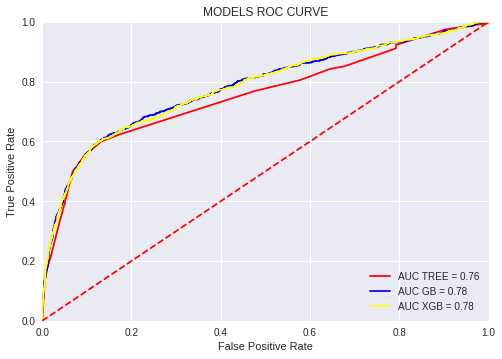

In [265]:
plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color = 'red')
# plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_RF, color = 'green')
plt.plot(fpr_GB, tpr_GB, 'b', label = 'AUC GB = %0.2f' % auc_GB, color = 'blue')
plt.plot(fpr_XGB, tpr_XGB, 'b', label = 'AUC XGB = %0.2f' % auc_XGB, color = 'yellow')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()